# Machine Learning For Regression

In [1]:
import numpy as np
import pandas as pd

## Data Preparation

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'
!wget $data

--2025-10-01 16:51:26--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  1.63MB/s    in 0.9s    

2025-10-01 16:51:27 (1.63 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory data analysis

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribution of price

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

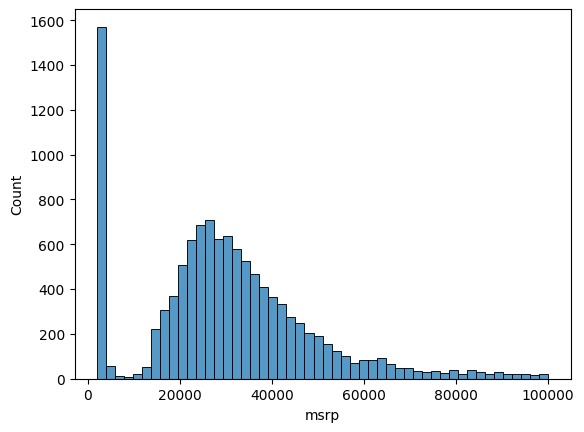

In [9]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [10]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

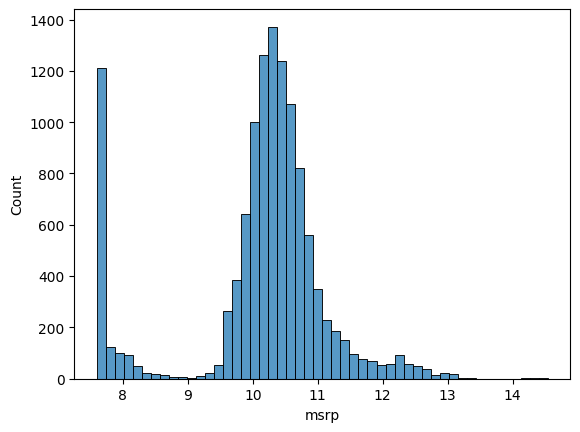

In [11]:
sns.histplot(price_logs, bins = 50)

Missing values

In [12]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting Up The Validation Framework

In [13]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [14]:
n_val, n_test, n_train

(2382, 2382, 7150)

The original dataframe should be shuffled before divining it to the train, validation and test sub dataframes

In [15]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [16]:
df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


The random index is not needed so let us reset it

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


We have got necessary dataframes 'X' for training, validation and testing so let us extract 'y'

In [18]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

Let us remove msrp series from our dataframes

In [19]:
df_train.drop(columns=['msrp'], errors='ignore', inplace=True)
df_val.drop(columns=['msrp'], errors='ignore', inplace=True)
df_test.drop(columns=['msrp'], errors='ignore', inplace=True)

## Linear regression

Suppose we have a list of characteristics of a random car

In [20]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

We want to use **engine_hp**, **highway_mpg** and **popularity** to predict a car price

In [21]:
xi = [453.0, 19, 86]

In that case, the linear regression formula will look like this<br> 
$g(xi) = w_0 + w_1 \times xi_1 + w_2 \times xi_2 + w_3 \times xi_3$<br>
or a shorthand version<br>
$g(xi) = w_0 + \Sigma_{j=1}^3(w_j \times x_ij)$

## Linear regression vector form

Looking at the last part of the formula above we see the dot product (vector-vector multiplication). $g(xi) = w_0 + x_i^T \times w$

Let’s implement again the dot product (vector-vector multiplication)

In [22]:
def dot(xi, w):
    n = len(xi)
     
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
         
    return res

Based on that the implementation of the linear_regression function could look like:

In [23]:
def linear_regression(xi):
    return w0 + dot(xi, w) 

To make the last equation more simple, we can imagine there is one more feature $x_{i0}$, that is always equal to 1.

$g(xi) = w_0 + x_i^T \times w \implies g(xi) = w_0x_{i0} + x_i^T \times w$

That means vector $w$ becomes a $n+1$ dimensional vector:

- $w = [w_0, w_1, w_2, … w_n]$
- $x_i = [x_{i0}, x_{i1}, x_{i2}, …, x_{in}] = [1, x_{i1}, x_{i2}, …, x_{in}]$

That means we can use the dot product for the entire regression.

In [24]:
xi = [138, 24, 1385]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [25]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [26]:
xi

[138, 24, 1385]

The updated code for linear_regression function looks now like

In [27]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)
 
linear_regression(xi)

12.280000000000001

Having done this, let’s go back to thinking about all the examples together.
$X$ is a $m \times x_{n+1}$ dimensional matrix (with $m$ rows and $n+1$ columns)

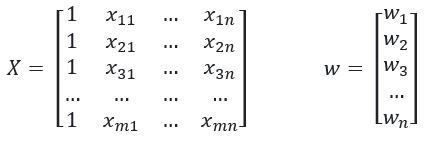

What we have to do here, for each row of $X$ we multiply this row with the vector $w$. This vector contains our predictions, therefor we call it $y_{pred}$.

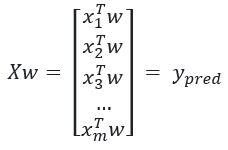

To sum up. What we need to do to get our model $g$ is a matrix vector multiplication between $X$ and $w$.

In [28]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w
 
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

$X$ becomes a list of lists

In [29]:
X = [x1, x2, x10]
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

This turns the list of lists into a matrix

In [30]:
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

Now we have predictions, so for each car we have a price for this car

In [31]:
y = X.dot(w_new)

Shortcut to not do -1 manually to get the real $ price

In [32]:
np.expm1(y) 

array([237992.82334859, 768348.51018973, 222347.22211011])

The next snippet shows the implementation of the adapted linear_regression function

In [33]:
def linear_regression(X):
    return X.dot(w_new)
 
y = linear_regression(X)
np.expm1(y)

array([237992.82334859, 768348.51018973, 222347.22211011])

## Training of a linear regression model

From the last article we know that we need to multiply the feature matrix $X$ with weights vector $w$ to get $y$ (the prediction for price).

$g(X) = X \times w \approx y$

Actually we want this $X \times w$ to be equal to $y$, but often it’s not possible.
To achieve this, we need to find a way to compute $w$.

We could have multiply both parts of our equation to $X^{-1}$:

$X \times w = y$

$(X^{-1} \times X) \times w = X^{-1} \times y$

$X^{-1} \times X$ turns to an identity matrix $I$, and in that case it will become as follows:

$I \times w = X^{-1} \times y$

And we could have get rid off $I$ and solve the equation, but the thing is that our $X$ is not actually a square matrix as it is rather rectangular one since it has more rows than columns. As a result, we can't obtain $I$. So how we can solve it? 

Let us try to find an approximate solution, and append $X^T$ to both side of the equation.

$X^T \times X \times w = X^T \times y$

$X^T \times X$ is actually a thing called **GRAM MATRIX**. For **GRAM MATRIX** $X^T \times X$ the inverse exists (not in all cases), because it is a square matrix (n+1) x (n+1)

![Illustration of Gram Matrix](https://www.researchgate.net/profile/Ngo-Le-Huy-Hien/publication/356667127/figure/fig4/AS:1098113318170624@1638822025033/The-Gram-Matrix-is-created-from-a-target-image-and-a-reference-image.jpg)

So let us add the inverse to our gram matrix $(X^T \times X)$

$(X^T \times X)^{-1} \times (X^T \times X) \times w = (X^T \times X)^{-1} \times X^T \times y$

In this case $(X^T \times X)^{-1} \times (X^T \times X)$ will become an identity matrix $I$

$I \times w = (X^T \times X)^{-1} \times X^T \times y$

Now we can get rid of $I$ since, as it was mentioned previously, when any square matrix is multiplied by the identity matrix of the appropriate size, the result is the original matrix leaves unchanged, so the solution for our equation will be as follow:

$w = (X^T \times X)^{-1} \times X^T \times y$

Now we know what to do. Let us implement the function **train_linear_regression**, that takes the feature matrix $X$ and the target variable $y$ and returns the vector w.

In [34]:
def train_linear_regression(X, y):
    pass

But before proceeding with the implementation, let us prepare some sample data to further test of our **train_linear_regression** function

In [35]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
 
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   83],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [36]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]
y

[10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

From the last article we know that we need to add a new column with ones to the feature matrix $X$. That is for the multiplication with $w_0$. We remember that we can use **np.ones()** to get a vector with ones at each position.

In [37]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Now we need to stack this vector of ones with our feature matrix $X$. For this we can use the NumPy function **np.column_stack()** as shown in the next snippet.

In [38]:
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.300e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

We have everything we need to test our solution $w = (X^T \times X)^{-1} \times X^T \times y$

In [39]:
# GRAM MATRIX
XTX = X.T.dot(X)
 
# Inverse GRAM MATRIX
XTX_inv = np.linalg.inv(XTX)

# w_full contains all the weights
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 3.00092529e+04, -2.27839691e+01, -2.57690874e+02, -2.30322797e+00])

From that vector **w_full** we can extract $w_0$ and all the remaining weights:

In [40]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(np.float64(30009.252922766562),
 array([ -22.78396914, -257.69087426,   -2.30322797]))

Let us now implement the function **train_linear_regression**, that takes the feature matrix $X$ and the target variable $y$ and returns $w_0$ and the vector $w$.

In [41]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

Let us test the implemented function with some simple examples:

In [42]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
 
X = np.array(X)
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]
 
train_linear_regression(X, y)

(np.float64(30009.252922766562),
 array([ -22.78396914, -257.69087426,   -2.30322797]))

## Car price baseline model

The next code snippet shows how to find all numerical columns

In [43]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

Now let us extract the following numerical columns from the training dataset: **engine_hp**, **engine_cylinders**, **highway_mpg**, **city_mpg**, and **popularity**.

In [44]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
 
df_train[base].head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657


### Value extraction

We need to extract the values to use them in training.

In [45]:
X_train = df_train[base].values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

We have already prices from training dataset

In [46]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

### Missing values

So let us try to train our model

In [47]:
train_linear_regression(X_train, y_train)

(np.float64(nan), array([nan, nan, nan, nan, nan]))

Oops, something went wrong. We have just got **nan** values. It happened due to **X_train** has null values

In [48]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

As you can see there are two columns that have missing values. The easiest thing we can do is fill them with zeros. But notice filling it with 0 makes the model ignore this feature, because:

$g(x_i) = w_0 + x_{i1} \times w_1 + x_{i2} \times w_2$

if $x_{i1} = 0$ then the last equation simplifies to

$g(x_i) = w_0 + 0 + x_{i2} \times w_2$

But 0 is not always the best way to deal with missing values, because that means there is an observation of a car with 0 cylinders or 0 horse powers. And a car without cylinders or 0 horse powers does not make much sense at this point. For the current example this procedure is sufficient for us.

In [49]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

As you can see in the last snippet, the missing values have disappeared. However, now we need to apply this change in the DataFrame.

In [50]:
X_train = df_train[base].fillna(0).values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

Now we can train our model using the **train_linear_regression** function that we have implemented in the last article. The function return the value for $w_0$ and and array for vector $w$.

In [51]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(7.927257388069986),
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

We can use this two variables to apply the model to our training dataset to see how well the model has learned the training data. We do not want the model to simply memorize the data, but to recognize the correlations. Later, we’ll also apply the model to unseen data so that we can eliminate memorization.

In [52]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

### Plotting model performance

Three snippets before, you can see the actual values for y. The last snippet shows the predicted values for y. You could now go through these two lists manually and compare them. A better and also visual possibility is provided by Seaborn. The next snippet shows how to output these two lists accordingly.

<Axes: ylabel='Count'>

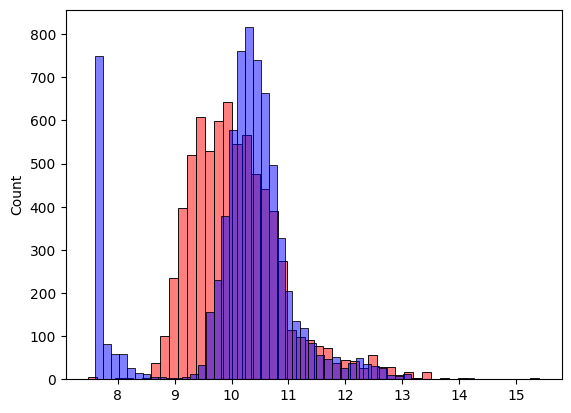

In [53]:
# alpha changes the transparency of the bars
# bins specifies the number of bars
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

You see from this plot that the model is not ideal but it’s better to have an objective way of saying that the model is good or not good. When we start improving the model, we also want to ensure that we really improving it. The next article is about an objective way to evaluate the performance of a regression model.

## RMSE

RMSE stands for Root-Mean-Squared Error. It is a common metric used in machine learning and statistics to measure the differences between predicted values and actual observed values, essentially indicating how concentrated the predictions are around the actual data. A lower RMSE signifies better model performance, with a perfect model having an RMSE of zero
                                                                                                                                                                                    

$RMSE = \sqrt{\Sigma_{i=1}^n(\frac{(predicted_i - actual_i)^2}{n})}$

In [54]:
def rmse(y, y_pred):
    error = y_pred - y 
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [55]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

## Validating the model

Let us create a separate function for a DataFrame preparation

In [56]:
def prepare_X(df):
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
    df_num = df[base]
    df_num = df_num.fillna(0)
    return df_num.values
    

Now, we will apply obtained w0 and w array to validation DataFrame and calculate an error

In [57]:
# Training part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.761653099130156)

## Simple feature engineering

Suppose we want to develop a new feature based on the existing ones in the feature matrix X. Let’s assume we want to use the year information as an age information. Let’s assume further we have year 2017.

In [58]:
df_train.year.max()

np.int64(2017)

In [59]:
max = df_train.year.max()
max - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

We can add this new feature **age** to our **prepare_X** function. What is one important remark here. It’s a good way to copy the dataframe inside **prepare_X**. Otherwise while using df you’ll modify the original data, what ist mostly not wanted.

In [60]:
def prepare_X(df):
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
    df = df.copy()
     
    df['age'] = 2017 - df.year
    features = base + ['age']
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X
 
X_train = prepare_X(df_train)
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]],
      shape=(7150, 6))

The output of the last snippet shows a list of lists. Each list has 6 items – 5 numerical columns and our new ‘age’ column. Let’s train a new model and see how the model performs.

In [61]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(0.5172055461058299)

We can see an improvement. The rmse decreased from 0.7328022115111966 to 0.5153662333982238. The improvement in the rmse was clear. Let’s see if this improvement can be seen in the plots as well.

<Axes: ylabel='Count'>

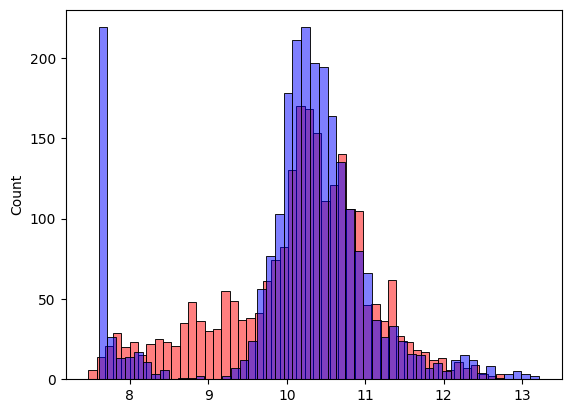

In [62]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

Here, too, a clear improvement can be seen. Many car prices are predicted much better. But there is still space for improvement.

## Categorical variables

Categorical variables are variables that are categories (typically strings)

Here: **make**, **model**, **engine_fuel_type**, **transmission_type**, **driven_wheels**, **market_category**, **vehicle_size**, **vehicle_style**. 

But, there is one value that looks like numerical variable, but it isn’t - **number_of_doors** is not really a numerical number.

In [63]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

Typical way of encoding such categorical variables is that we represent it with a bunch of binary columns – so called **one-hot encoding**. For each value we have a different column.

| Num of doors | num_doors_2 | num_doors_3 | num_doors_4 |
| :--------: | :--------: | :--------: | :--------: |
| 2 | 1 | 0 | 0 |
| 3 | 0 | 1 | 0 |
| 4 | 0 | 0 | 1 |
| 2 | 1 | 0 | 0 |

We can imitate this encoding by turning the booleans from the last snippet into integers (1 and 0) and creating a new variable for each number of doors.

In [64]:
(df_train.number_of_doors == 2).astype('int')

0       1
1       0
2       0
3       0
4       0
       ..
7145    1
7146    1
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int64

In [65]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X
 
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]], shape=(7150, 9))

When you look at the output of the last snippet you see at the end of each list there are three new items – one for each number of doors (2, 3, 4). Now we can check if the model performance has improved with the new features.

In [66]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(0.515799564150169)

We see in contrast to the last training with rmse of 0.5153662333982238 there is only a slightly improvement, almost negligible so the number of doors feature is not that useful. Maybe the ‘Make’ information is more useful.

In [67]:
df.make.nunique() 

48

There are 48 unique values in the **make** column. That could be too much. Let’s look at the most popular ones.

In [68]:
df.make.value_counts().head()

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

If we want to get the actual values, we use the index property

In [69]:
# Wrap it in a usual Python list
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

We can now adapt again our prepare_X function to add the new feature

In [70]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
         
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

Now we can use our new **prepare_X** function and train and validate again.

In [71]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(0.5076038849556795)

The model performance has once again improved somewhat. How about adding all the other categorical variables now? This should improve the performance even more, right? Let’s try.

In [72]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]
 
# The dictionary category will contain for each of the categories 
# the top 5 most common ones
categories = {}
 
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)
     
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

The next snippet shows how to implement the new features to our **prepare_X** function. This time we need two loops as described inline.

In [73]:
def prepare_X(df):
    # this is good way to do, otherwise while using df you'll modify the original data
    # what is mostly not wanted
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
 
    # First loop is for each key of the dictionary categories.
    # Second loop is for each value inside the categories
    # For each of this values we create a new column.
    for c, values in categories.items():    
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

Now we can train the model again and apply it to the validation data to see what is the model performance.

In [74]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(23.019020704791835)

This time the model performance is very bad. As you can see the RMSE (23.01) is very large. So something went wrong. In the next article we’ll see why that has happened and how to fix it.

## Regularization

The topic for this part is regularization as a way to solve the problem of bad model performance.

If the feature matrix has duplicate columns (or columns that can be expressed as a linear combination of other columns), it will not have an inverse matrix.

In [75]:
# You see here 2nd and 3rd columns are identical
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5]
]
 
X = np.array(X) 
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [76]:
#np.linalg.inv(XTX) it will throw an Error - LinAlgError: Singular matrix

But, sometimes this error could be passed if certain values are slightly different between duplicated columns.

In [77]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001],
]
 
X = np.array(X) 
XTX = X.T.dot(X)
np.linalg.inv(XTX)

array([[ 3.92646538e-02, -1.54615164e+05,  1.54615121e+05],
       [-1.54615170e+05,  3.51843724e+13, -3.51843721e+13],
       [ 1.54615129e+05, -3.51843721e+13,  3.51843718e+13]])

So, if we apply the normal equation with this feature matrix, and the values associated with duplicated columns are very large, it will decrease the model performance. To solve this issue, one alternative is adding a small number to the diagonal of the feature matrix, which corresponds to regularization.

Remember there was the eye function to get an Identity matrix. Maybe we can use this

In [78]:
np.eye(3)
alpha = 0.01
 
# When adding XTX to this matrix, it adds one on the diagonal
XTX + np.eye(3)
 
# We can multiply this eye by a smal number
XTX = XTX + alpha * np.eye(3)
XTX

array([[140.01     , 111.       , 111.0000004],
       [111.       , 108.01     , 108.0000005],
       [111.0000004, 108.0000005, 108.010001 ]])

In [79]:
np.linalg.inv(XTX)

array([[ 3.85624710e-02, -1.98161275e-02, -1.98156884e-02],
       [-1.98161275e-02,  5.00124979e+01, -4.99875026e+01],
       [-1.98156884e-02, -4.99875026e+01,  5.00124970e+01]])

We are controlling the weights that they don't grow too much. **alpha** = 0.01 is a parameter, and the larger this parameter, the larger the numbers on the diagonal, and the smaller the values in the inverse XTX matrix.

This leads us to reimplementing the train_linear_regression function again.

In [80]:
# reg = regularized
# parameter r = short for regularization
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

To test the effect of regularization, we need to re-train our model and apply it to the validation data. Then we can calculate the rmse.

In [81]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(0.45652199012897743)

This is the best result we had before, but we don't know that there is no better one.

To find a good value for r is the topic of the next article.

# Tuning the model

The topic for this article is finding the best regularization parameter for our linear regression model. We realized that the parameter **r** affects the quality of our model and now we try to find the best value for this **r**.

In [82]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
 
    score = rmse(y_val, y_pred)
     
    print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)

reg parameter:  0.0 bias term:  4011091003551887.0 rmse:  23.019020704791835
reg parameter:  1e-05 bias term:  6.178192055025445 rmse:  0.45651702823445617
reg parameter:  0.0001 bias term:  6.317246071243372 rmse:  0.45651706543230514
reg parameter:  0.001 bias term:  6.285636717989048 rmse:  0.4565175086778138
reg parameter:  0.01 bias term:  6.2766071476973995 rmse:  0.45652199012897743
reg parameter:  0.1 bias term:  6.1912087238544915 rmse:  0.4565692763007501
reg parameter:  1 bias term:  5.634896668066369 rmse:  0.45722043179930605
reg parameter:  10 bias term:  4.283980108968471 rmse:  0.4701456932099909


What you see here is using **r=0** makes the bias term huge and the rmse score aswell.
**0.001** could be a good parameter for **r**.

In [83]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
score = rmse(y_val, y_pred)
    
print("rmse: ",score)

rmse:  0.4565175086778138


# Using the model

In the last article we found the best parameter for the linear regression and in this lesson we’ll train the model again and use it. What we did so far is, we trained our model on training dataset and applied the best model on validation dataset. To check the model performance we calculated the RMSE.

What we want to do now is to train our final model on both training dataset and validation dataset. We call this **FULL TRAIN**. After that we make the final evaluation on the test dataset to make sure that our model works fine and check what is the value for RMSE. It shouldn’t be too different from what we saw on the validation dataset.

## Combining datasets

First step to do is getting our data. So we need to combine **df_train** and **df_val** into one dataset. We can use Pandas ``concat()`` function that takes a list of dataframes and concatenates them together.

In [89]:
df_full_train = pd.concat([df_train, df_val])
df_full_train.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


We also need to concatenate **y_train** and **y_val** to get **y_full_train**. This time we use the concatenate function of NumPy library.

In [90]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ], shape=(9532,))

## Resetting index

When combining two dataframes it can happen that the index is not sequential. Here you can use an already known function and reset the index.

In [92]:
df_full_train = df_full_train.reset_index(drop=True)

## Getting feature matrix X

Now we have again a coherent dataset for training and we can prepare it for the usage as we did before. The ``prepare_X()`` function still works fine.

In [91]:
X_full_train = prepare_X(df_full_train) 
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]], shape=(9532, 41))

## Train the final model

Next step is to train the final model on the combined dataset. We’re using the new ``train_linear_regression_reg()`` function to get the value for $w_0$ and the vector $w$.

In [93]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
w0, w

(np.float64(6.322830302349775),
 array([ 1.52506332e-03,  1.18188703e-01, -6.66105494e-03, -5.33413785e-03,
        -4.87603208e-05, -9.69091838e-02, -7.92620449e-01, -8.90861655e-01,
        -6.35100382e-01, -4.14339224e-02,  1.75560743e-01, -5.78063598e-04,
        -1.00563877e-01, -9.27549641e-02, -4.66859195e-01,  7.98658894e-02,
        -3.16047745e-01, -5.51981714e-01, -7.89526802e-02,  1.09397462e+00,
         9.18667079e-01,  1.14824449e+00,  2.65138017e+00,  5.08603719e-01,
         1.62979575e+00,  1.53049981e+00,  1.61767854e+00,  1.54567793e+00,
        -9.70559706e-02,  3.73062128e-02, -5.81767490e-02, -2.35940871e-02,
        -1.19357192e-02,  2.18895260e+00,  2.07458270e+00,  2.05916686e+00,
        -5.00802769e-02,  5.62184639e-02,  1.84794024e-01,  3.32646151e-01,
        -1.58817038e-01]))

## Applying model to test data

Now is the great moment for the final model. It must pass the final test. For this purpose we use test data, which are again prepared with the ``prepare_X()`` function. Then the model is applied to the test data and the RMSE can be calculated.

In [94]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
 
score = rmse(y_test, y_pred)
    
print("rmse: ",score)

rmse:  0.4517749310621406


RMSE_test = 0.4517749310621406 is not so far away from RMSE_val = 0.4565175086778138. That means the model generalizes quite well and it didn’t get this score by chance. Now we have our final model and we can use it. The way we want to use it is to predict the price of an (unseen) car – unseen means here that the model hasn’t seen this car during training.

## The model use case

Using the model means:

1. Extracting all the features (getting feature vector of the car)
2. Applying our final model to this feature vector & predicting the price

## Feature Extraction

For this step we can take any car from our test dataset and pretend it’s a new car. Let’s just take one car.

In [95]:
df_test.iloc[20]

make                            toyota
model                           sienna
year                              2015
engine_fuel_type      regular_unleaded
engine_hp                        266.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         25
city_mpg                            18
popularity                        2031
Name: 20, dtype: object

Usually the way we do it is that we don’t get a dataframe here. But it could be a Python dictionary with all the information about the car. In real life you can imagine a website or an app, where people enter all the values. Then the website sends the request with all the information (as dictionary) to the model. The model replies back with the predicted price.

For this example we turn this data of our car into a dictionary.

In [96]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

The car is our request and now remember the ``prepare_X`` function expects a dataframe, so we need to create a dataframe with a single row for our request.

In [97]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


We can use this single row DataFrame as input for the ``prepare_X()`` function to get the feature matrix. In this case our feature matrix is a feature vector.

In [98]:
X_small = prepare_X(df_small)
X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

## Predicting the price

The final step is to apply the final model to our requested car (feature vector) and predict the price.

In [99]:
y_pred = w0 + X_small.dot(w)
# Don't need an array but it's first (and only) item
y_pred = y_pred[0]
y_pred

np.float64(10.462651700289744)

10.46 is still not the price in $. To get the real price we need to undo the logarithm.

In [100]:
np.expm1(y_pred)

np.float64(34983.19616272936)

After undoing the logarithm we get the price in dollars. So we think that a car with these characteristics should cost 34983 dollars.

Lastly to get an evaluation about model performance let’s compare the predicted price to the actual price of this requested car.

In [101]:
np.expm1(y_test[20])

np.float64(35000.00000000001)